In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Paths
train_dir = r"C:\Users\shrir\Music\New folder\archive\Training"
test_dir = r"C:\Users\shrir\Music\New folder\archive\Testing"

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 8

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2870 images belonging to 4 classes.


Found 394 images belonging to 4 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step - accuracy: 0.5143 - loss: 1.1374 - val_accuracy: 0.3832 - val_loss: 2.0204
Epoch 2/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - accuracy: 0.7385 - loss: 0.6157 - val_accuracy: 0.4289 - val_loss: 2.0917
Epoch 3/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 260ms/step - accuracy: 0.8313 - loss: 0.4353 - val_accuracy: 0.6015 - val_loss: 2.2631
Epoch 4/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 290ms/step - accuracy: 0.8932 - loss: 0.2905 - val_accuracy: 0.6320 - val_loss: 2.3025
Epoch 5/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 257ms/step - accuracy: 0.9084 - loss: 0.2269 - val_accuracy: 0.6421 - val_loss: 2.4515
Epoch 6/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.9354 - loss: 0.1672 - val_accuracy: 0.7360 - val_loss: 2.6142
Epoch 7/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 247ms/step - accuracy: 0.9477 - loss: 0.1357 - val_accuracy: 0.6954 - val_loss: 2.7680
Epoch 8/8
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 0.9596 - loss: 0.1088 - val_accuracy: 0.

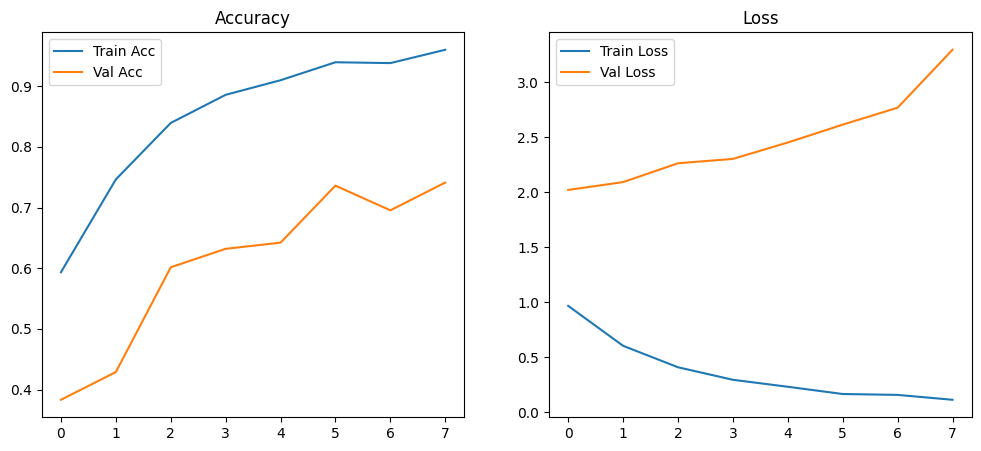

In [8]:

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)

# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    # Load and preprocess the image
    try:
        img = image.load_img(img_path, target_size=(img_height, img_width))
    except Exception as e:
        print(f"Error loading image: {e}")
        return None, None

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred_probs = model.predict(img_array)
    pred_class_idx = np.argmax(pred_probs, axis=1)[0]
    # Invert the class_indices dictionary
    idx_to_class = {v: k for k, v in train_gen.class_indices.items()}
    predicted_label = idx_to_class[pred_class_idx]
    confidence = pred_probs[0][pred_class_idx]

    print(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
    return predicted_label, confidence

# Example usage:
predict_image(r"C:\Users\shrir\Music\New folder\archive\Testing\pituitary_tumor\image(8).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted: pituitary_tumor (Confidence: 0.70)


('pituitary_tumor', np.float32(0.69944495))

In [10]:
predict_image(r"C:\Users\shrir\Music\New folder\archive\Testing\no_tumor\image(2).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: no_tumor (Confidence: 1.00)


('no_tumor', np.float32(0.9999677))

In [11]:
predict_image(r"C:\Users\shrir\Music\New folder\archive\Testing\meningioma_tumor\image(5).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: no_tumor (Confidence: 1.00)


('no_tumor', np.float32(0.9969073))